In [ ]:
#ESTE MODELO É ONDE EU TENHO AS DUAS TENTATIVAS DE FAZER APLICAR O SARIMAX 

# importing Libraries 

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import statsmodels.api as sm
import pmdarima as pm
from scipy import stats


# Loading and Handling the Data

In [84]:
df = pd.read_csv('bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv')

In [85]:
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4857377 entries, 0 to 4857376
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Timestamp          int64  
 1   Open               float64
 2   High               float64
 3   Low                float64
 4   Close              float64
 5   Volume_(BTC)       float64
 6   Volume_(Currency)  float64
 7   Weighted_Price     float64
dtypes: float64(7), int64(1)
memory usage: 296.5 MB


In [87]:
pd.to_datetime(df['Timestamp'], origin = 'unix')

0         1970-01-01 00:00:01.325317920
1         1970-01-01 00:00:01.325317980
2         1970-01-01 00:00:01.325318040
3         1970-01-01 00:00:01.325318100
4         1970-01-01 00:00:01.325318160
                       ...             
4857372   1970-01-01 00:00:01.617148560
4857373   1970-01-01 00:00:01.617148620
4857374   1970-01-01 00:00:01.617148680
4857375   1970-01-01 00:00:01.617148740
4857376   1970-01-01 00:00:01.617148800
Name: Timestamp, Length: 4857377, dtype: datetime64[ns]

In [88]:

df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='s')
df.tail()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
4857372,2021-03-30 23:56:00,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
4857373,2021-03-30 23:57:00,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
4857374,2021-03-30 23:58:00,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496
4857375,2021-03-30 23:59:00,58742.18,58770.38,58742.18,58760.59,0.720415,42332.958633,58761.866202
4857376,2021-03-31 00:00:00,58767.75,58778.18,58755.97,58778.18,2.712831,159417.751000,58764.349363


In [89]:
df.isna().sum()

#todos sao iguais todos têm a mesma quantidade de não numeros 

Timestamp                  0
Open                 1243608
High                 1243608
Low                  1243608
Close                1243608
Volume_(BTC)         1243608
Volume_(Currency)    1243608
Weighted_Price       1243608
dtype: int64

## Prepping a Data frame by resampling the data

We are going to use Monthly tests because, if we use daily data we will have 3 days without any data.

In [91]:
df.index = df.Timestamp

df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,,
2011-12-31 07:52:00,2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
2011-12-31 07:53:00,2011-12-31 07:53:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-31 07:54:00,2011-12-31 07:54:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-31 07:55:00,2011-12-31 07:55:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-31 07:56:00,2011-12-31 07:56:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [92]:
data_frame_monthly = df[ :'2019-12-31' ]

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,,
2020-01-01 00:00:00,2020-01-01 00:00:00,7160.69,7160.69,7159.64,7159.64,5.501691,39392.484606,7160.068520
2020-01-01 00:01:00,2020-01-01 00:01:00,7161.51,7161.51,7155.09,7161.20,3.776924,27047.304680,7161.198209
2020-01-01 00:02:00,2020-01-01 00:02:00,7158.82,7158.82,7158.82,7158.82,0.029278,209.595359,7158.820000
2020-01-01 00:03:00,2020-01-01 00:03:00,7158.82,7158.82,7156.90,7156.90,0.065819,471.156094,7158.321885
2020-01-01 00:04:00,2020-01-01 00:04:00,7158.50,7158.50,7154.97,7157.20,0.971387,6950.500833,7155.235666
...,...,...,...,...,...,...,...,...
2021-03-30 23:56:00,2021-03-30 23:56:00,58714.31,58714.31,58686.00,58686.00,1.384487,81259.372187,58692.753339
2021-03-30 23:57:00,2021-03-30 23:57:00,58683.97,58693.43,58683.97,58685.81,7.294848,428158.146640,58693.226508
2021-03-30 23:58:00,2021-03-30 23:58:00,58693.43,58723.84,58693.43,58723.84,1.705682,100117.070370,58696.198496


In [168]:
data_frame_monthly = data_frame_monthly.resample('M').mean()
data_frame_test = df.resample('M').mean()

data_frame_monthly

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Weighted_Price_box,weighted_Box_Difference,weighted_Box_Reg_Difference
Timestamp,,,,,,,,,,
2011-12-31,4.465000,4.482500,4.465000,4.482500,23.829470,106.330084,4.471603,1.637463,NaN,NaN
2012-01-31,6.345389,6.348982,6.341218,6.346148,4.031777,25.168238,6.345955,2.063509,NaN,0.426046
2012-02-29,5.230208,5.231646,5.227036,5.228510,8.313993,42.239422,5.228443,1.825604,NaN,-0.237905
2012-03-31,4.985481,4.986695,4.982580,4.983828,15.197791,76.509751,4.984397,1.767723,NaN,-0.057881
2012-04-30,4.995171,4.996447,4.993763,4.995079,21.683913,108.218094,4.995091,1.770311,NaN,0.002588
...,...,...,...,...,...,...,...,...,...,...
2019-08-31,10618.244129,10624.139355,10611.628380,10617.729889,5.675777,60917.756522,10617.966133,16.772140,1.333437,-0.014897
2019-09-30,9786.282584,9791.275409,9779.898713,9783.826320,5.085752,48032.382862,9786.434235,16.531202,1.137453,-0.240937
2019-10-31,8368.005894,8373.653173,8363.518180,8367.720931,6.147061,52852.370415,8368.913103,16.075317,0.754965,-0.455886


In [95]:
data_frame_monthly.isna().sum()

Open                 0
High                 0
Low                  0
Close                0
Volume_(BTC)         0
Volume_(Currency)    0
Weighted_Price       0
dtype: int64

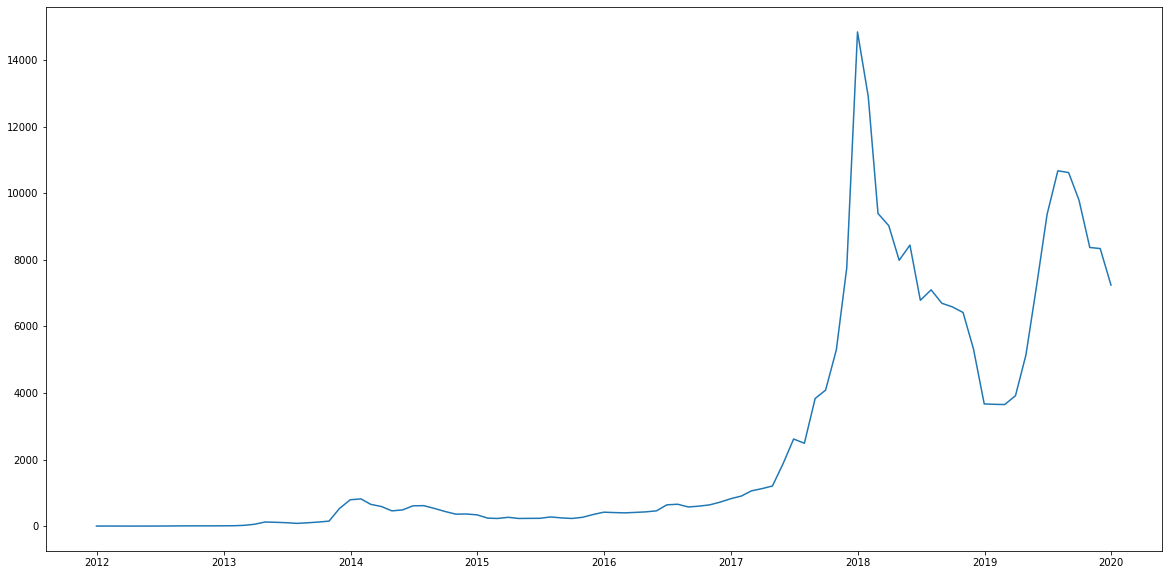

In [126]:
plt.rcParams["figure.figsize"] = (20,10)

plt.plot(data_frame_monthly['Weighted_Price'])

# Checking if the time series is stationary or if it isn't

Most Models work on the assumption that the time Series are stationary: Being stationary means that the variance is constant over time:

* constant mean
* constant variance
* autocovariance independent over time.

We will use the `Dickey-Fuller` Test to check if it is stationary: 



Here the null hypothesis is that the Time series is non-stationary. in other words: 

* if the result is `> 5%` the data set is `non-stationary`.
* if the result is `< 5%` the data set is `stationary`.


In [127]:
def Dickey_fuller_test(x):
    
    ''' Função para verificar se a serie é stationary ou não'''
    
    Dickey_fuller = sm.tsa.stattools.adfuller(x)
    print(f'Dickey-Fuller p = {Dickey_fuller[1]}')
    if Dickey_fuller[1] > 0.05:
        print('Time series is non-stationary')
    else:
        print('Time series is stationary')
    
    


Dickey-Fuller p = 0.3857572230896142
Time series is non-stationary


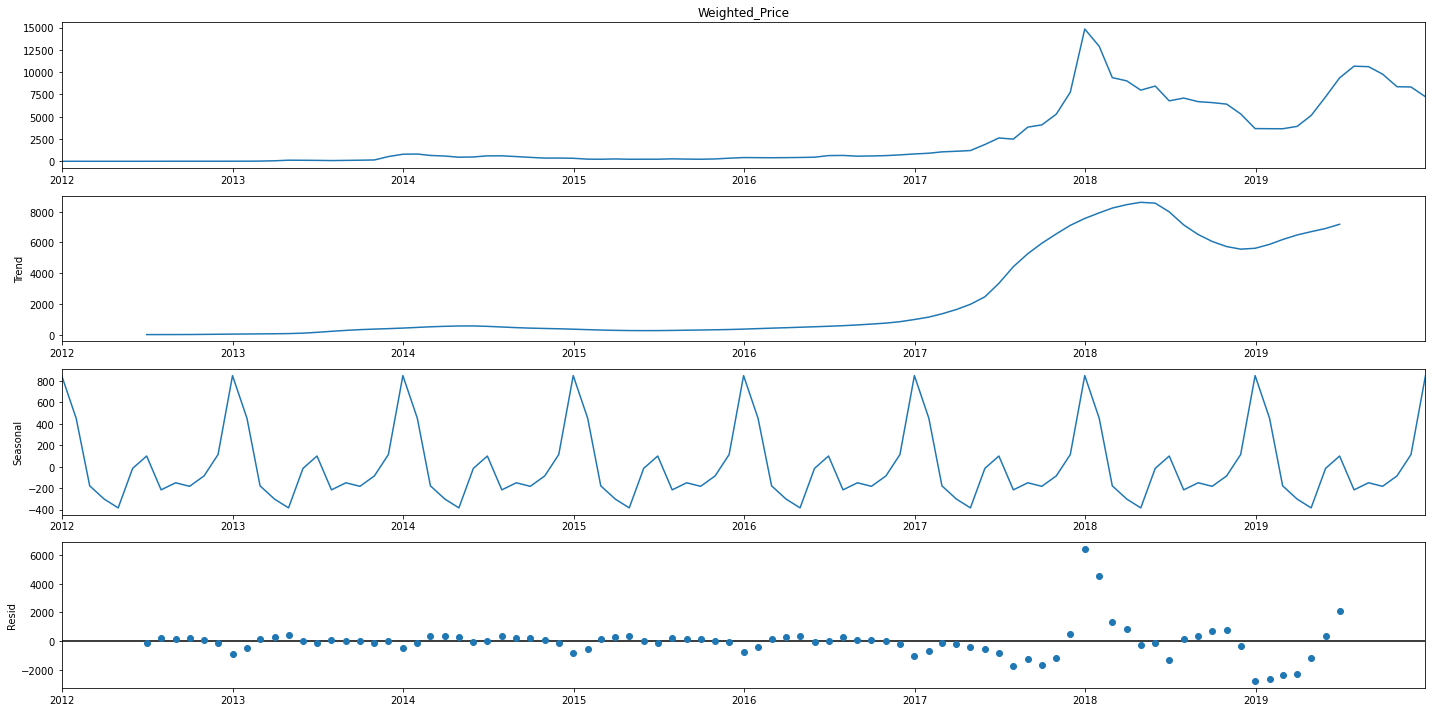

In [128]:
from statsmodels.tsa.seasonal import seasonal_decompose
sm.tsa.seasonal_decompose(data_frame_monthly.Weighted_Price).plot()

Dickey_fuller_test(data_frame_monthly.Weighted_Price)

# Transforming data using the Box-Cox transformation:


The `Box-Cox transformation` transforms our data so that it closely resembles a normal distribution. In many statistical techniques, we assume that the errors are normally distributed.

This is one of the first steps so that we make our data stationary.

In [129]:
data_frame_monthly['Weighted_Price_box'], Lambda = stats.boxcox(data_frame_monthly['Weighted_Price'])

In [130]:
Dickey_fuller_test(data_frame_monthly['Weighted_Price_box'])

Dickey-Fuller p = 0.6220561552777202
Time series is non-stationary


# Checking Trend and Seasonality

In order to make a model stationary we need to check if the time series stationary we need to check if it has a `trend` and `seasonality` and then correct them:

1. **Trend** – varying mean over time.
2. **Seasonality** – variations at specific time-frames.

## Differencing the model:

 In this technique, we take the difference of the observation at a particular instant with that of a previous instant. To see if we can make the model stationary 
 
 ### Seasonal Differentiation
 
 A Seasonal differentiation compares the data from a period against the same period last year.

In [131]:
data_frame_monthly['weighted_Box_Difference'] = data_frame_monthly['Weighted_Price_box']-data_frame_monthly['Weighted_Price_box'].shift(12)
Dickey_fuller_test(data_frame_monthly['weighted_Box_Difference'][12:])


#data_frame_monthly['weighted_Box_Difference'].isna().sum()
#temos que tirar os primeiros 12 porque nao temos esses dados.   

Dickey-Fuller p = 0.4789915839826967
Time series is non-stationary


### Regular Differentiation
 
 A Regular differentiation compares the data from a period before that.

In [132]:
data_frame_monthly['weighted_Box_Reg_Difference'] = data_frame_monthly['Weighted_Price_box']-data_frame_monthly['Weighted_Price_box'].shift(1)
Dickey_fuller_test(data_frame_monthly['weighted_Box_Reg_Difference'][1:])


Dickey-Fuller p = 5.990992877512278e-08
Time series is stationary


## Decomposing the model:

 In this case seasonality and trend are going to be modeled separately so that we get the remaining part - the Residue.

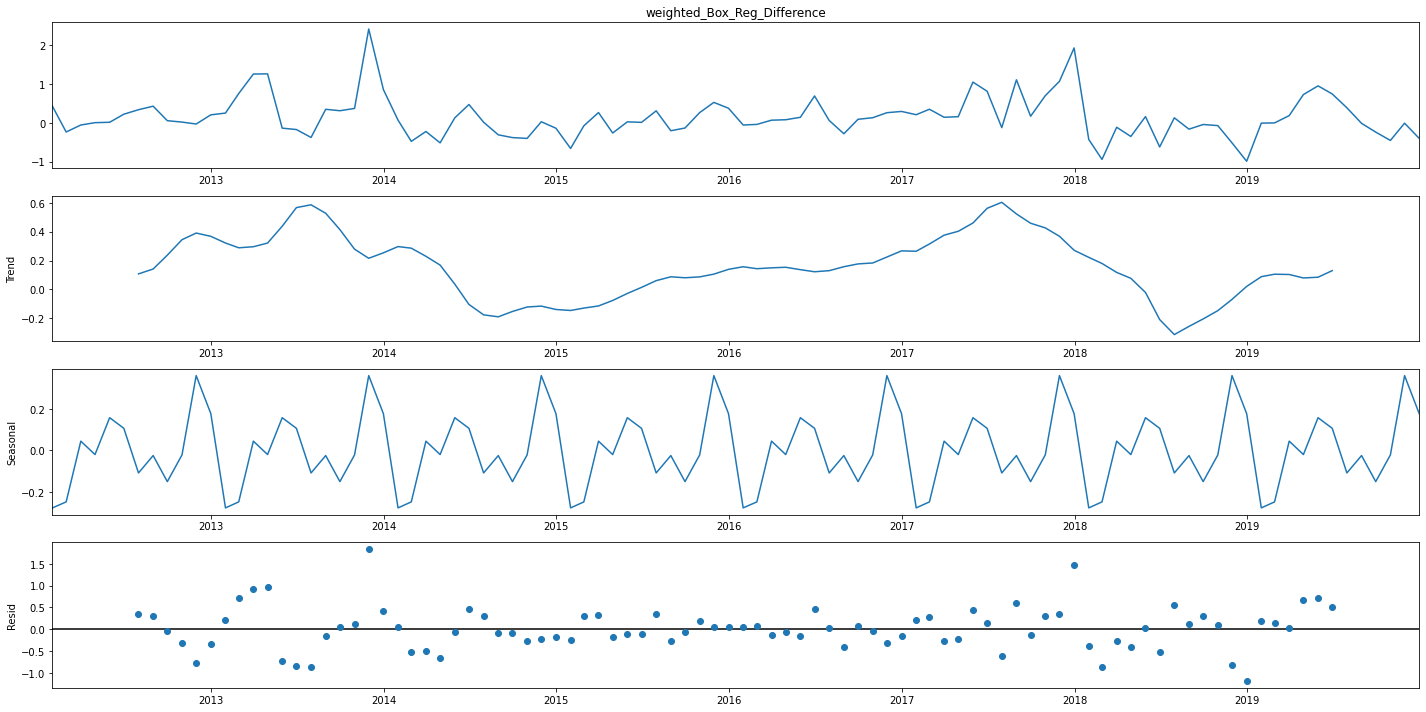

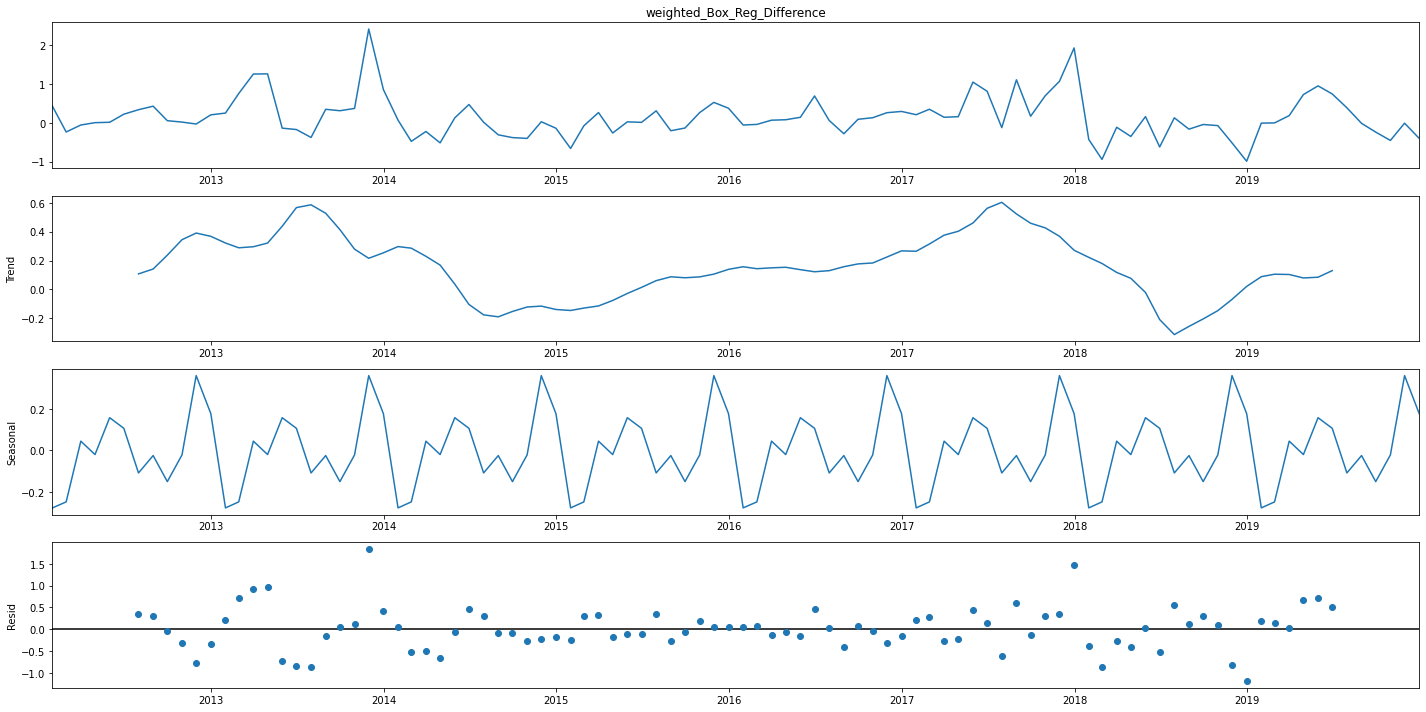

In [133]:
sm.tsa.seasonal_decompose(data_frame_monthly['weighted_Box_Reg_Difference'][1:]).plot()


#O gajo colocou 13 mas não sei bem por que, se der pau, temos que voltar aqui e colocar 13.


# SARIMAX Model (seasonal auto regressive integrated moving average)

* 1 - The AR (p): is a lag we are going to use:
* 2 - The MA (q): is the order of the moving average: it is the difference between a certain value and the moving average at a certain place.
* 3 - The (d): is the the number of nonseasonal differences. 

To find them o need to look at the autocorrelation and partial-autocorrelation graphs.

In [134]:

data_frame_monthly.weighted_Box_Reg_Difference[13:].count()


84

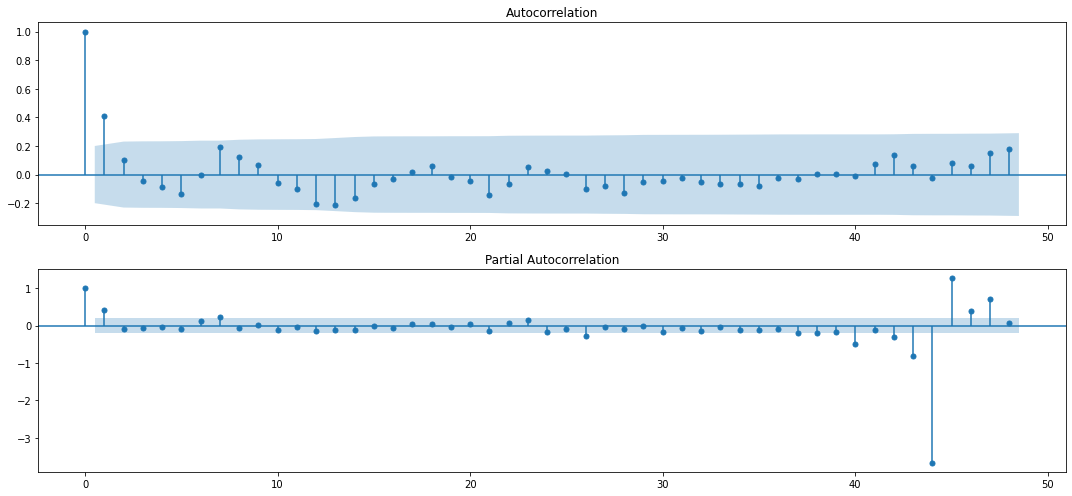

In [135]:
plt.figure(figsize=(15,7))
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(data_frame_monthly['weighted_Box_Reg_Difference'][1:].values.squeeze(), lags=48, ax=ax)
ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(data_frame_monthly['weighted_Box_Reg_Difference'][1:].values.squeeze(), lags=48, ax=ax)
plt.tight_layout()
plt.show()

##from here we have q of 2

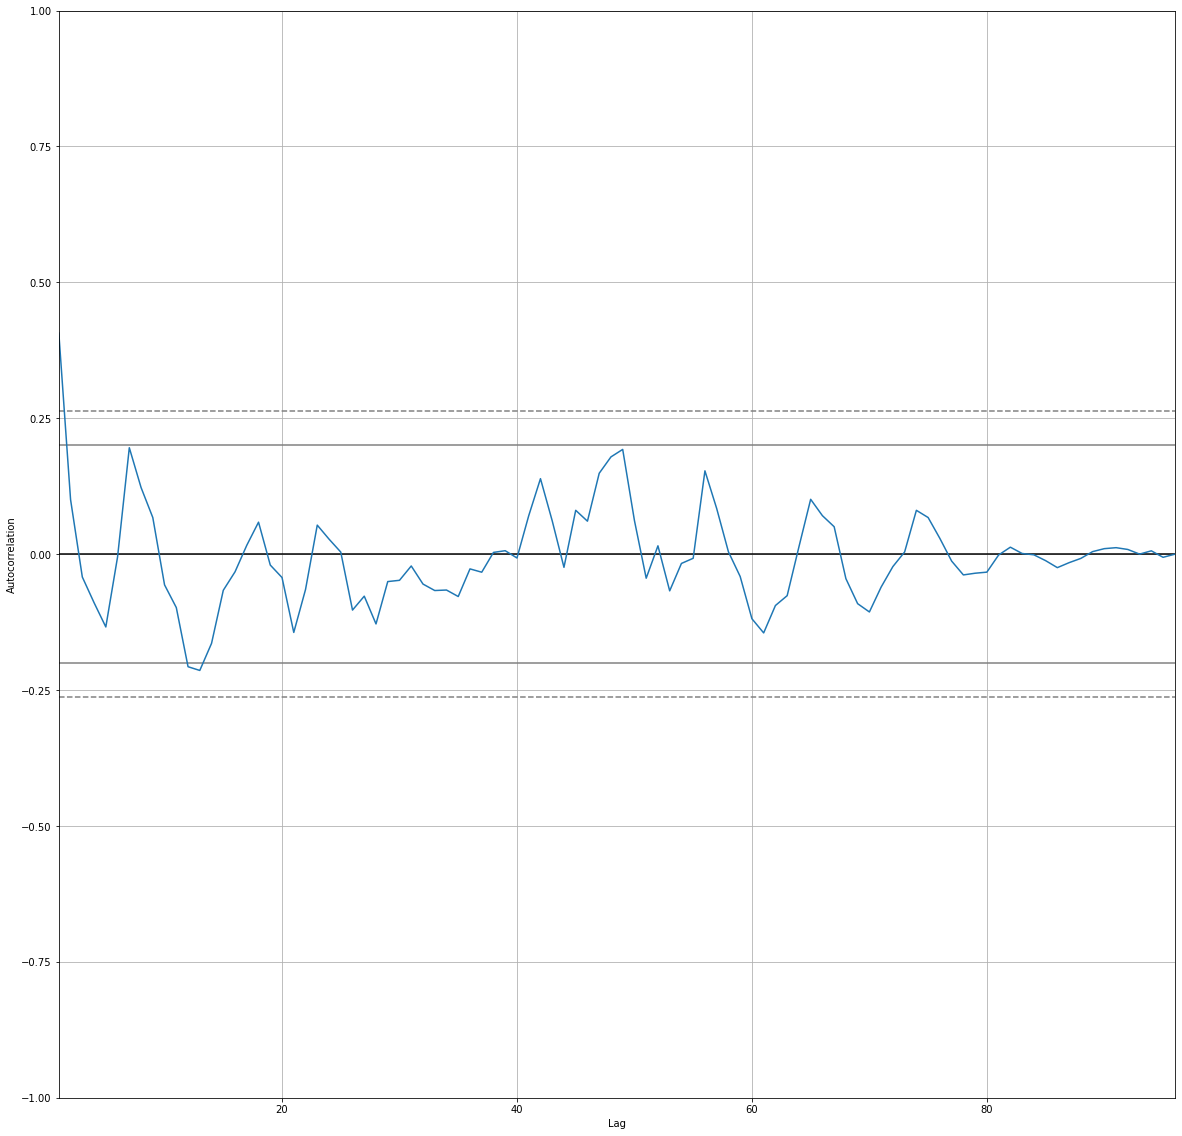

In [136]:

from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot
%matplotlib inline


plt.rcParams["figure.figsize"] = (20,20)
autocorrelation_plot(data_frame_monthly['weighted_Box_Reg_Difference'][1:])
pyplot.show()

#from here we conclude p is 0, 1 or 2 

In [137]:

model =  pm.auto_arima(data_frame_monthly['Weighted_Price_box'],
                     seasonal = True,
                     m = 12,
                     d = 1, D = 1,
                     start_p = 1,start_q = 0,
                     max_p = 1, max_q = 2,
                     max_P = 1, max_Q = 2,
                     trace = True,
                     error_action='ignore',
                      suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.69 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=214.897, Time=0.05 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=160.960, Time=0.24 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=1.19 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=197.074, Time=0.10 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=inf, Time=1.67 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=175.206, Time=0.17 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=162.583, Time=0.39 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=164.934, Time=0.26 sec
 ARIMA(1,1,0)(1,1,0)[12] intercept   : AIC=162.132, Time=0.43 sec

Best model:  ARIMA(1,1,0)(1,1,0)[12]          
Total fit time: 5.198 seconds


In [138]:
from  statsmodels.tsa.statespace.sarimax import SARIMAX


model = SARIMAX(data_frame_monthly['Weighted_Price_box'],order = (1,1,0), seasonal_order = (1,1,0,12))

results = model.fit()

Dickey–Fuller test:: p=0.000000


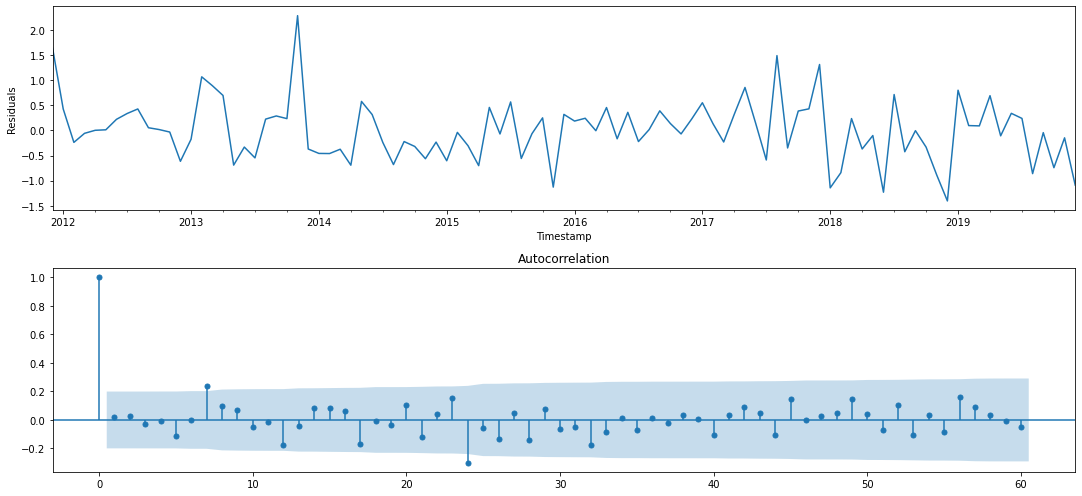

In [139]:
plt.figure(figsize=(15,7))
plt.subplot(211)
results.resid.plot()
plt.ylabel(u'Residuals')
ax = plt.subplot(212)
sm.graphics.tsa.plot_acf(results.resid.values.squeeze(), lags=60, ax=ax)

print("Dickey–Fuller test:: p=%f" % sm.tsa.stattools.adfuller(results.resid)[1])

plt.tight_layout()
plt.show()

Dickey–Fuller test:: p=0.000000


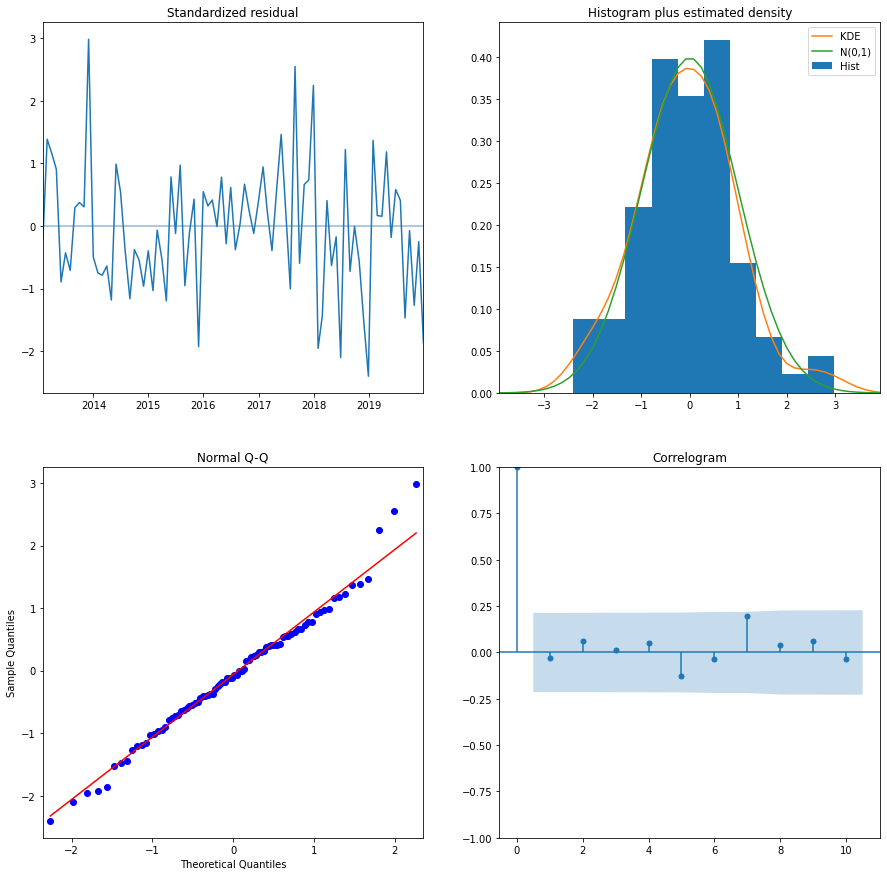

In [140]:
print("Dickey–Fuller test:: p=%f" % sm.tsa.stattools.adfuller(results.resid)[1])

results.plot_diagnostics(figsize = (15,15))
plt.show()

# Train

Now we need to take the data back to its original form:

In [141]:
#fist we need to reverse the box cox

def invboxcox(y,lmbda):
   if Lambda == 0:
      return(np.exp(y))
   else:
      return(np.exp(np.log(lmbda*y+1)/lmbda))

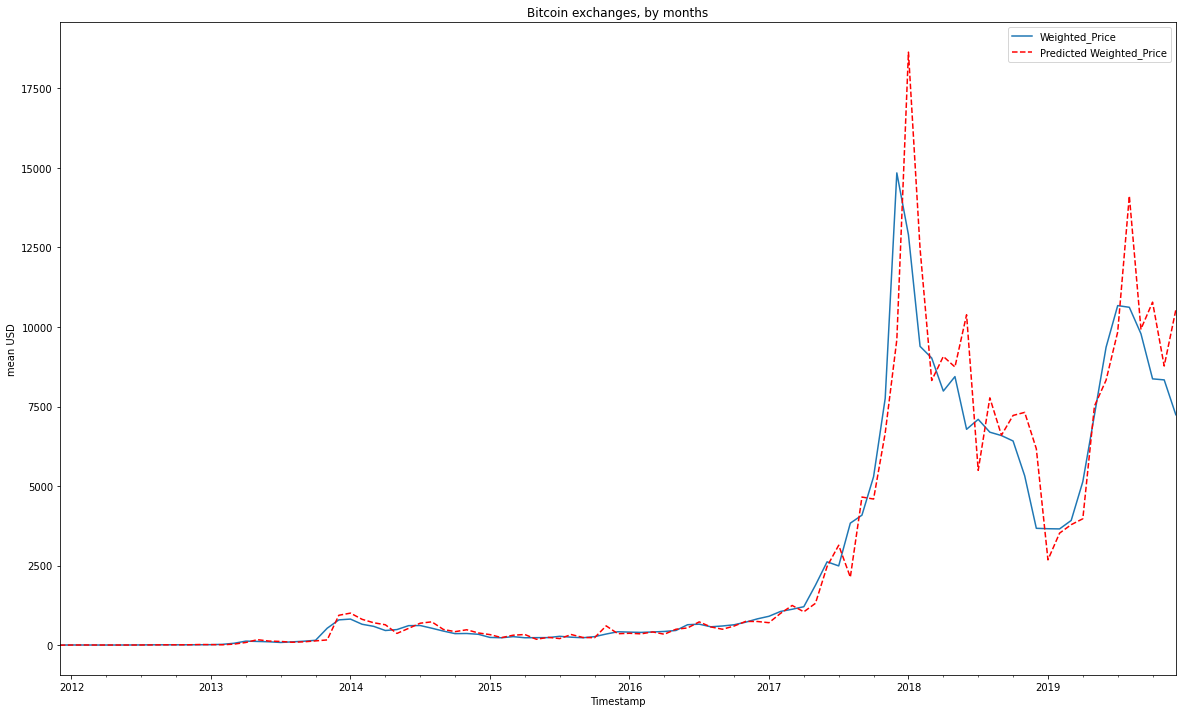

In [148]:
dataframe_month2 = data_frame_monthly[['Weighted_Price']]
#date_list = [datetime(2020, 1, 31), datetime(2021, 5, 31), datetime(2021, 6, 30), datetime(2021, 7, 30), 
#            datetime(2021, 8, 31), datetime(2021, 9, 30), datetime(2021, 10, 31), datetime(2021, 11, 30),
#            datetime(2021, 12, 31)]
#future = pd.DataFrame(index=date_list, columns= data_frame_monthly.columns)
dataframe_month2 = pd.concat([dataframe_month2])
dataframe_month2['forecast'] = invboxcox(results.predict(start=0, end=114), Lambda)
plt.figure(figsize=(20,12))
dataframe_month2.Weighted_Price.plot()
dataframe_month2.forecast.plot(color='r', ls='--', label='Predicted Weighted_Price')
plt.legend()
plt.title('Bitcoin exchanges, by months')
plt.ylabel('mean USD')
plt.show()

# Test

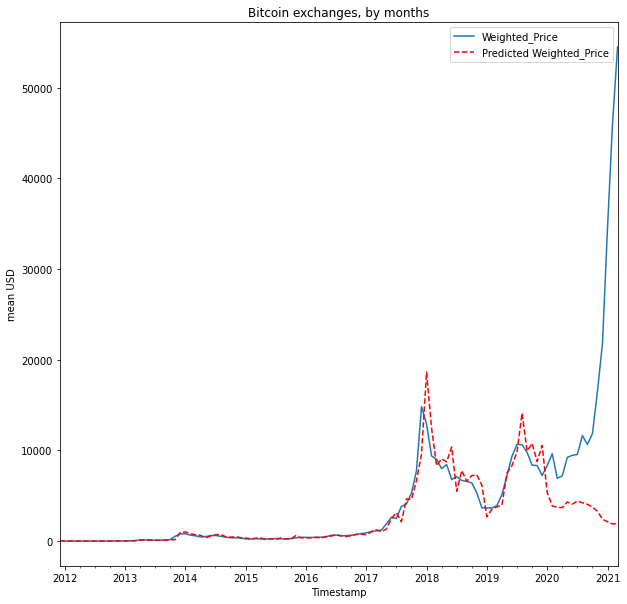

In [170]:
dataframe_month2 = data_frame_test[['Weighted_Price']]
#date_list = [datetime(2020, 1, 31), datetime(2021, 5, 31), datetime(2021, 6, 30), datetime(2021, 7, 30), 
#            datetime(2021, 8, 31), datetime(2021, 9, 30), datetime(2021, 10, 31), datetime(2021, 11, 30),
#            datetime(2021, 12, 31)]
#future = pd.DataFrame(index=date_list, columns= data_frame_monthly.columns)
dataframe_month2 = pd.concat([dataframe_month2])
dataframe_month2['forecast'] = invboxcox(results.predict(start=0, end=114), Lambda)
plt.figure(figsize=(10,10))
dataframe_month2['Weighted_Price'].plot()
dataframe_month2.forecast.plot(color='r', ls='--', label='Predicted Weighted_Price')
plt.legend()
plt.title('Bitcoin exchanges, by months')
plt.ylabel('mean USD')
plt.show()